In [1]:
import pygmt

In [2]:
gridMC = pygmt.datasets.load_earth_relief(resolution="15s", region=[92, 170, -20, 20])

In [3]:
# 109° 36‟ 22” - 109° 45‟ 49” E, 6° 50‟ 50‟‟ - 7° 12‟ 05‟‟ S
#gridSungaiKupang = pygmt.datasets.load_earth_relief(resolution="03s", 
#                                                    region=[109.606111, 109.763611,
#                                                            -7.201389, -6.847222])

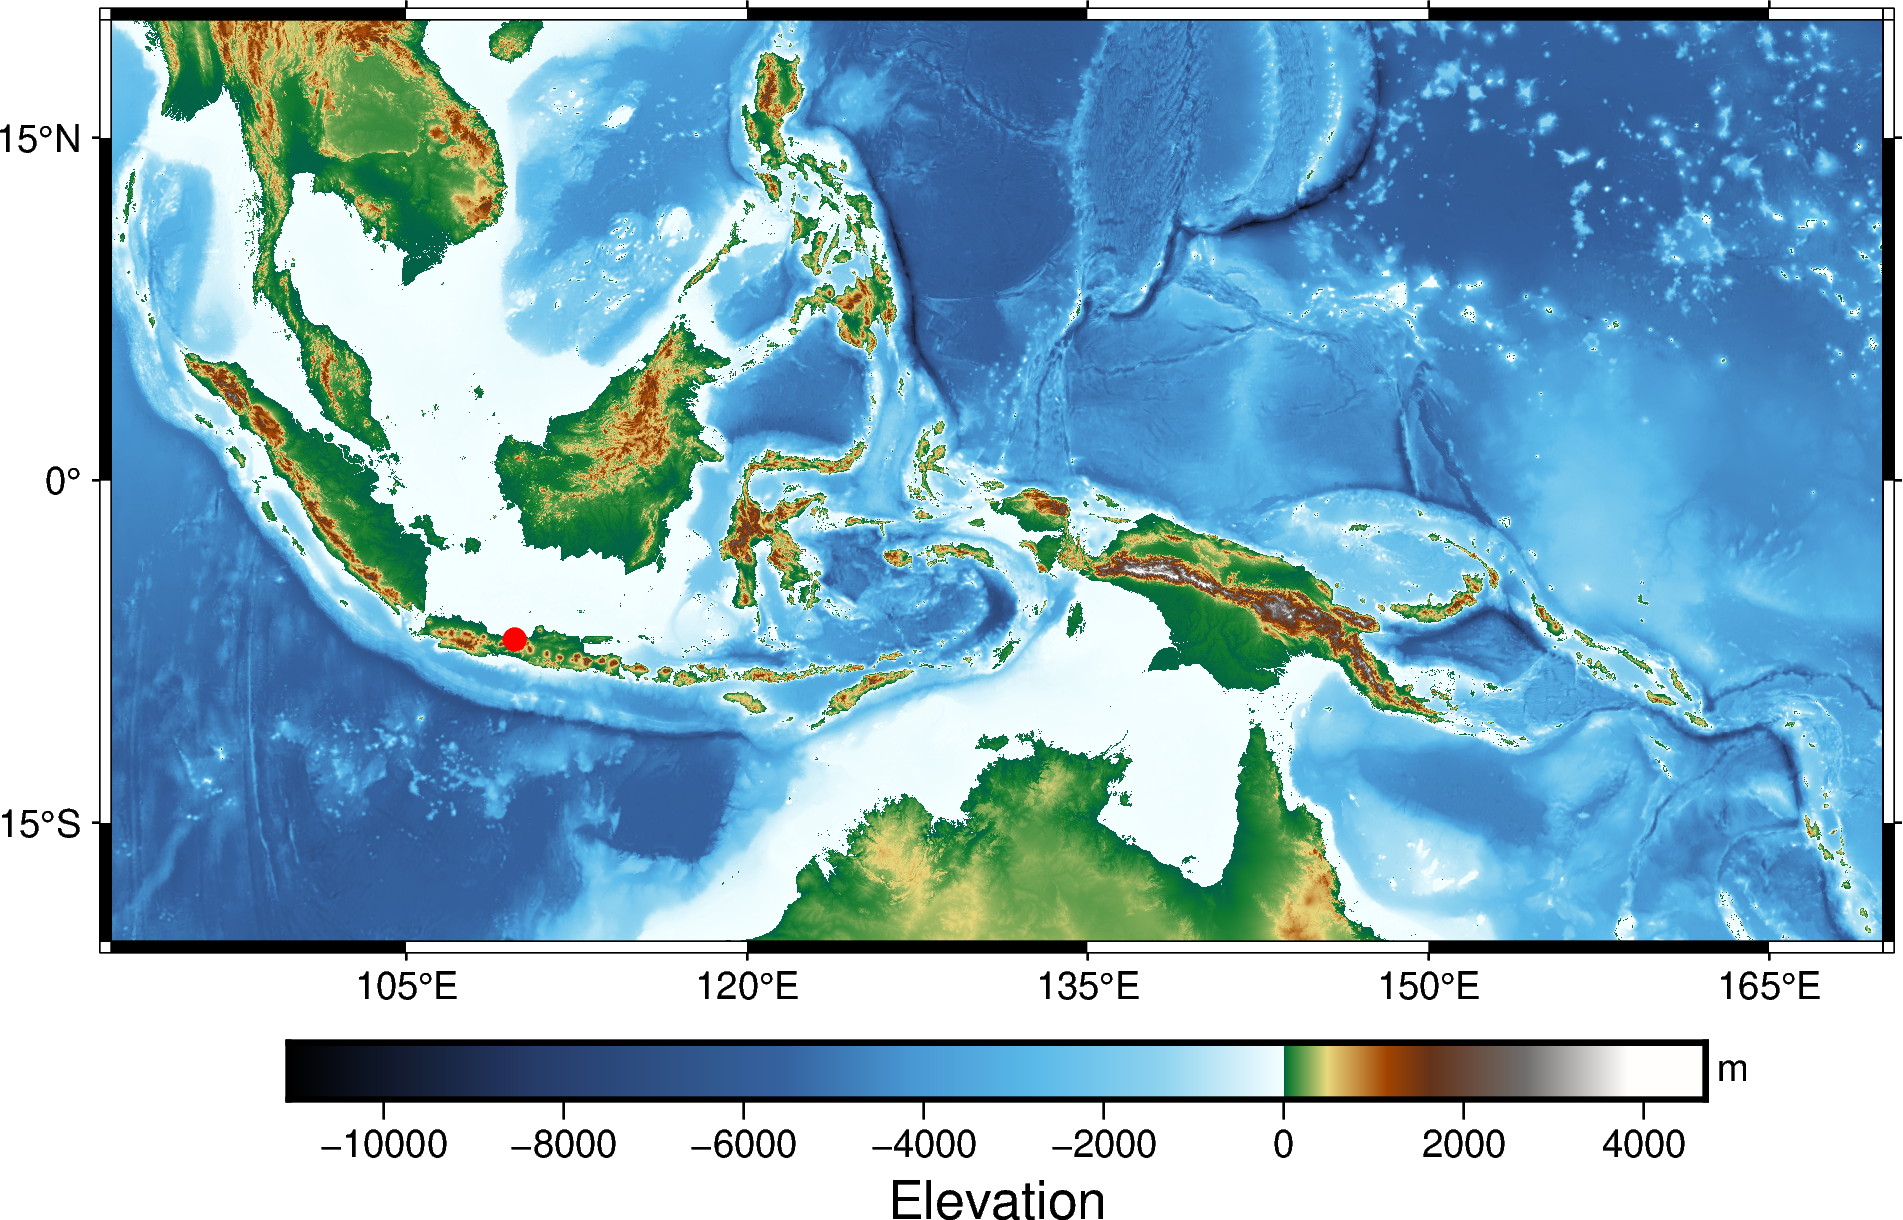

In [8]:
fig = pygmt.Figure()
fig.grdimage(grid=gridMC, projection="M15c", frame="a", cmap="geo")
fig.plot(x=109.76111, y=-7.03056, style="c0.2c", color="red")
fig.colorbar(frame=["a2000", "x+lElevation", "y+lm"])
fig.show()
fig.savefig('../figs/fig1.png')